In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer = load_breast_cancer()

In [7]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [12]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [14]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [16]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
scaler.fit(df)

StandardScaler()

In [23]:
scaled_data = scaler.transform(df)

In [25]:
#PCA
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=2)

In [27]:
pca.fit(scaled_data)

PCA(n_components=2)

In [29]:
x_pca = pca.transform(scaled_data)

In [31]:
scaled_data.shape

(569, 30)

In [32]:
x_pca.shape

(569, 2)

Text(0, 0.5, 'Second Principal Component')

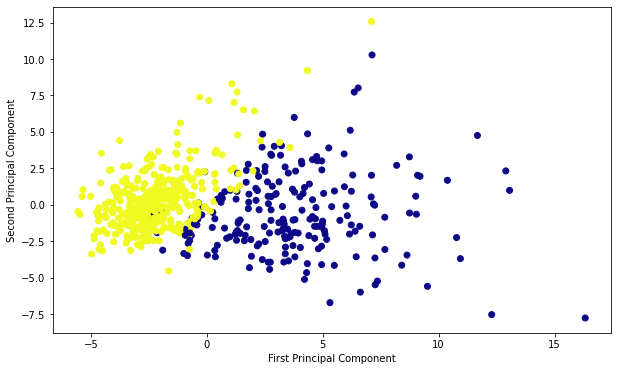

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=cancer['target'], cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [37]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [38]:
df_comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'])

<AxesSubplot:>

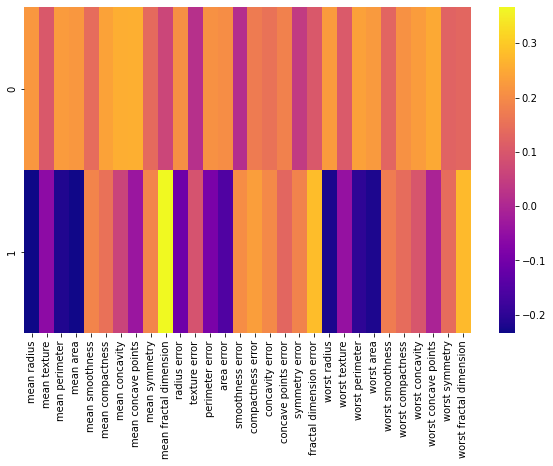

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(df_comp, cmap='plasma')